In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 18.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yaml

train_images_path = '/kaggle/input/weeds-detection/dataset/images/train'
val_images_path = '/kaggle/input/weeds-detection/dataset/images/val'
test_images_path = '/kaggle/input/weeds-detection/dataset/images/test'
classes = ['Crop', 'Weed'] 

data = {
    'train': train_images_path,
    'val': val_images_path,
    'test': test_images_path,
    'nc': len(classes),
    'names': classes
}

with open('data_config.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("YAML file created successfully.")

YAML file created successfully.


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt") 

model.train(data="/kaggle/working/data_config.yaml", epochs=50) 
metrics = model.val() 
path = model.export(format="onnx") 

Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data_config.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 21.4MB/s]
2024-07-02 13:04:56,016	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-02 13:04:57,227	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/weeds-detection/dataset/labels/train... 1245 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1245/1245 [00:03<00:00, 341.88it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/weeds-detection/dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/weeds-detection/dataset/labels/val... 247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 363.02it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/weeds-detection/dataset/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.37G      1.422      2.337      1.714         39        640: 100%|██████████| 78/78 [00:17<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        247        382      0.789      0.491      0.592      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.33G      1.414      1.807      1.665         52        640: 100%|██████████| 78/78 [00:14<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.31it/s]


                   all        247        382      0.517      0.479      0.482      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.33G      1.407      1.624      1.665         44        640: 100%|██████████| 78/78 [00:14<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.35it/s]


                   all        247        382      0.295      0.298       0.21     0.0764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.33G      1.404      1.544      1.668         39        640: 100%|██████████| 78/78 [00:13<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.44it/s]


                   all        247        382      0.495      0.431      0.476      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.33G      1.398      1.482       1.68         41        640: 100%|██████████| 78/78 [00:14<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.49it/s]

                   all        247        382      0.682        0.6      0.684      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.33G      1.378      1.375      1.657         53        640: 100%|██████████| 78/78 [00:13<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]

                   all        247        382      0.535      0.485      0.487      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.33G      1.363      1.342      1.639         40        640: 100%|██████████| 78/78 [00:14<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.44it/s]

                   all        247        382      0.873      0.629      0.749      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G      1.313      1.233      1.591         37        640: 100%|██████████| 78/78 [00:14<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]

                   all        247        382      0.802      0.641      0.759      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.33G      1.307      1.215      1.604         34        640: 100%|██████████| 78/78 [00:14<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]

                   all        247        382      0.736      0.528      0.599      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.33G      1.297      1.204      1.568         41        640: 100%|██████████| 78/78 [00:13<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.40it/s]

                   all        247        382      0.768      0.756      0.821      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.32G      1.267      1.115      1.574         53        640: 100%|██████████| 78/78 [00:14<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.39it/s]

                   all        247        382       0.73      0.764      0.789      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.32G      1.291      1.165      1.565         52        640: 100%|██████████| 78/78 [00:13<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]

                   all        247        382      0.843      0.763      0.833      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.32G      1.245      1.118       1.54         53        640: 100%|██████████| 78/78 [00:13<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.40it/s]

                   all        247        382      0.797      0.768      0.794      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.32G      1.244      1.077      1.532         59        640: 100%|██████████| 78/78 [00:13<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]

                   all        247        382      0.789      0.677      0.749      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.32G      1.238      1.075      1.535         28        640: 100%|██████████| 78/78 [00:13<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.43it/s]

                   all        247        382      0.856      0.774      0.846      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.32G      1.218      1.056       1.52         54        640: 100%|██████████| 78/78 [00:13<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.45it/s]

                   all        247        382      0.829      0.788       0.85       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.32G      1.222       1.04      1.512         53        640: 100%|██████████| 78/78 [00:14<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.41it/s]

                   all        247        382      0.728       0.73      0.782      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.32G      1.205      1.031      1.501         40        640: 100%|██████████| 78/78 [00:13<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.38it/s]

                   all        247        382      0.849       0.79      0.848      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.32G       1.19      1.006      1.511         63        640: 100%|██████████| 78/78 [00:14<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]

                   all        247        382      0.825      0.768      0.855      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.32G      1.148     0.9783      1.482         42        640: 100%|██████████| 78/78 [00:13<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.53it/s]

                   all        247        382      0.797       0.81      0.844      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.32G      1.163     0.9808      1.462         49        640: 100%|██████████| 78/78 [00:14<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.34it/s]

                   all        247        382      0.824      0.794      0.863      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.32G       1.15     0.9521      1.478         45        640: 100%|██████████| 78/78 [00:13<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.57it/s]

                   all        247        382      0.856        0.8      0.865      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.32G      1.174     0.9563      1.483         38        640: 100%|██████████| 78/78 [00:13<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        247        382      0.873      0.758      0.858      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.32G      1.175     0.9594      1.472         41        640: 100%|██████████| 78/78 [00:13<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        247        382      0.858      0.818      0.863       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.32G      1.132     0.9302      1.461         36        640: 100%|██████████| 78/78 [00:13<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        247        382      0.876      0.805       0.88      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.32G      1.132     0.9099      1.456         36        640: 100%|██████████| 78/78 [00:13<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        247        382      0.845      0.801      0.873       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.32G      1.131     0.9241      1.458         39        640: 100%|██████████| 78/78 [00:13<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.50it/s]

                   all        247        382      0.851       0.82      0.868      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.32G      1.118     0.9278      1.454         52        640: 100%|██████████| 78/78 [00:13<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        247        382      0.813      0.833      0.884      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.32G      1.106     0.8983      1.422         46        640: 100%|██████████| 78/78 [00:13<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]

                   all        247        382      0.853      0.838      0.892      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.32G      1.125     0.8805      1.438         35        640: 100%|██████████| 78/78 [00:13<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

                   all        247        382      0.851       0.82      0.876      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.32G       1.09     0.8667      1.432         60        640: 100%|██████████| 78/78 [00:13<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.53it/s]

                   all        247        382      0.836      0.828      0.883      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.32G      1.114     0.8881      1.433         36        640: 100%|██████████| 78/78 [00:13<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.21it/s]

                   all        247        382      0.859      0.824      0.883      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.32G      1.086     0.8691      1.437         42        640: 100%|██████████| 78/78 [00:13<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]

                   all        247        382      0.859      0.833      0.892      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.32G      1.101     0.8817      1.418         34        640: 100%|██████████| 78/78 [00:14<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]

                   all        247        382      0.873      0.802      0.885      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.32G      1.063     0.8347      1.414         35        640: 100%|██████████| 78/78 [00:14<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.35it/s]

                   all        247        382      0.871      0.831      0.894      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.32G      1.077     0.8529      1.413         37        640: 100%|██████████| 78/78 [00:14<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        247        382      0.868      0.809      0.882      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.32G      1.067     0.8586      1.416         33        640: 100%|██████████| 78/78 [00:13<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.56it/s]

                   all        247        382      0.882      0.816      0.892      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.32G      1.072     0.8416      1.408         46        640: 100%|██████████| 78/78 [00:14<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]

                   all        247        382      0.846      0.846      0.898      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.32G       1.07     0.8276      1.395         49        640: 100%|██████████| 78/78 [00:14<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.30it/s]

                   all        247        382      0.834      0.852      0.892      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.32G      1.067     0.8266      1.392         51        640: 100%|██████████| 78/78 [00:14<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.53it/s]

                   all        247        382      0.847      0.883       0.91      0.633


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.32G     0.9835      0.764      1.447         32        640: 100%|██████████| 78/78 [00:15<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]

                   all        247        382      0.857      0.826      0.896      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.32G     0.9656     0.7122       1.43         29        640: 100%|██████████| 78/78 [00:14<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.32it/s]

                   all        247        382      0.871      0.872      0.903      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.32G     0.9653     0.6944      1.422         13        640: 100%|██████████| 78/78 [00:13<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.54it/s]

                   all        247        382      0.843      0.876      0.903      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G     0.9509     0.6838      1.402         26        640: 100%|██████████| 78/78 [00:14<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.52it/s]

                   all        247        382      0.868      0.852      0.913      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.32G     0.9375     0.6673      1.383         43        640: 100%|██████████| 78/78 [00:13<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.39it/s]

                   all        247        382      0.856      0.869      0.908      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.32G     0.9193     0.6528      1.372         13        640: 100%|██████████| 78/78 [00:13<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]

                   all        247        382      0.864      0.865      0.913      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.32G     0.9002     0.6542      1.376         14        640: 100%|██████████| 78/78 [00:13<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        247        382      0.894       0.83      0.911      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.32G      0.901     0.6465      1.373         22        640: 100%|██████████| 78/78 [00:13<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.53it/s]

                   all        247        382      0.903      0.845      0.916      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.32G      0.886     0.6236      1.368         19        640: 100%|██████████| 78/78 [00:13<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        247        382      0.895      0.845      0.915      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.32G     0.8957     0.6321      1.355         26        640: 100%|██████████| 78/78 [00:13<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]

                   all        247        382       0.89      0.847      0.918      0.665



50 epochs completed in 0.231 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]


                   all        247        382       0.89      0.847      0.918      0.665
                  Crop        118        215      0.858      0.814      0.899      0.675
                  Weed        129        167      0.923       0.88      0.937      0.655
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train2


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▅▄▁▄▄▆▆▅▇▇▇▆▇▇▇▇▇▇▇▇████████████████████
metrics/mAP50-95(B),▄▃▁▃▂▅▅▄▅▆▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████
metrics/precision(B),▇▄▁▃▄█▇▆▆▇▇▇▇▆▇▇▇▇█▇▇▇▇▇▇▇▇███▇▇▇█▇█████
metrics/recall(B),▃▃▁▃▃▅▅▄▇▇▇▆▇▆▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇██▇████▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,████▇▇▇▆▆▆▆▆▅▅▅▅▅▄▅▅▄▄▄▄▄▄▄▄▃▃▃▃▂▂▂▂▁▁▁▁


Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/weeds-detection/dataset/labels/val... 247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 849.81it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/weeds-detection/dataset/labels is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]


                   all        247        382      0.895      0.847      0.918      0.663
                  Crop        118        215      0.866      0.813      0.898      0.673
                  Weed        129        167      0.923       0.88      0.937      0.654
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train22
Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 0.7s, saved as 'runs/detect/train2/weights/best.onnx' (11.7 MB)

Export complete (2.3s)
Results saved to /kaggle/working/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train2/weights/bes

In [9]:
!yolo predict model='/kaggle/working/runs/detect/train2/weights/best.pt' source='/kaggle/input/weeds-detection/dataset/images/val/agri_0_1166.jpeg'

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/weeds-detection/dataset/images/val/agri_0_1166.jpeg: 640x640 1 Weed, 158.5ms
Speed: 6.8ms preprocess, 158.5ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


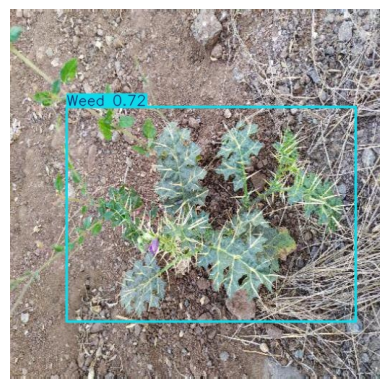

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/kaggle/working/runs/detect/predict/agri_0_1166.jpeg"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off') 
plt.show()

In [13]:
import os
os.chdir(r'/kaggle/working')

In [15]:
import shutil
from IPython.display import FileLink

directory_to_zip = '/kaggle/working/'
output_zip_file = '/kaggle/working/predict_output.zip'

shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', directory_to_zip)

FileLink(output_zip_file)

/kaggle/working/predict_output.zip